In [1]:
# library road
import numpy as np
import pandas as pd
import nltk
import re,string,unicodedata
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [2]:
# train, test road
train_data = pd.read_csv('/content/Corona_NLP_train.csv',encoding = 'latin_1')
test_data = pd.read_csv('/content/Corona_NLP_test.csv',encoding = 'latin_1')

In [3]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


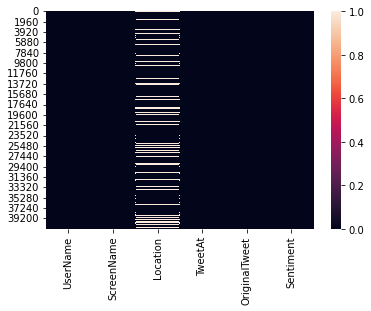

In [5]:
# Null value check
sns.heatmap(train_data.isnull());

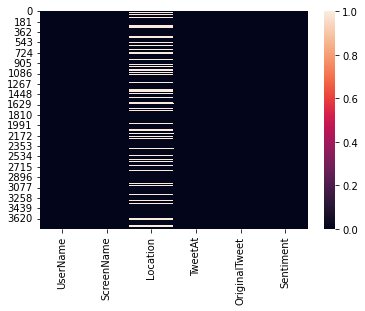

In [6]:
sns.heatmap(test_data.isnull());

In [7]:
# drop duplicate and 'NA' value/s
train_data.drop_duplicates(inplace= True)
test_data.drop_duplicates(inplace=True)

In [8]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [9]:
# copy data(데이터 복사해두기)
train_df = train_data.copy()
test_df = test_data.copy()

In [10]:
# check null value
print(train_df.isnull().sum())
print("*"*50)
print(test_df.isnull().sum())

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64
**************************************************
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


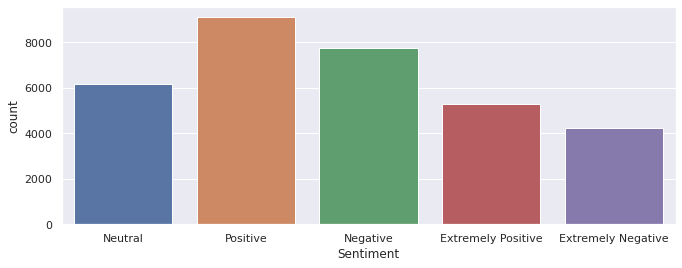

In [11]:
# EDA
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})

sns.countplot(train_df['Sentiment'])

5가지의 감정 유형이 있는것을 볼 수 있다.

In [12]:
# function(positive와 negative로 감정 재설정)
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

In [13]:
# 함수적용하기
train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x: change_sen(x))
test_df['Sentiment'] = test_df['Sentiment'].apply(lambda x: change_sen(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


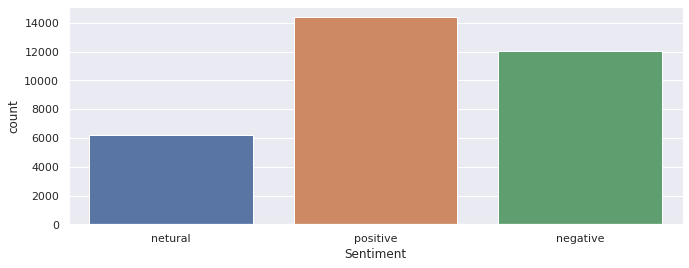

In [14]:
sns.countplot(train_df['Sentiment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


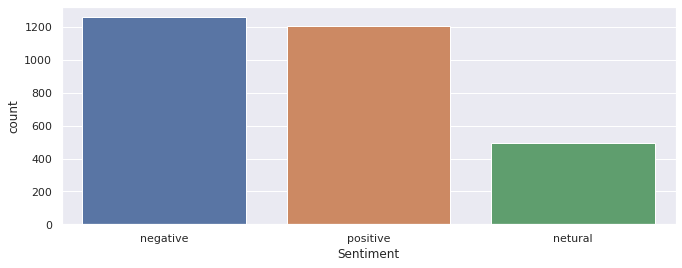

In [15]:
sns.countplot(test_df['Sentiment'])

Data Cleaning and Processing

In [16]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# load stop words
stop_word = stopwords.words('english')

In [18]:
# 함수만들기(불필요한 문자 제거 함수)
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
      
    return text

In [19]:
# 함수 적용하기
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean(x))
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(lambda x: clean(x))

In [20]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,netural
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news regionÂs first confirmed COVID- case ...,positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier grocery store sharing insights To prov...,positive


이제 필요한것은 OriginalTweet과  Seniment 두개이므로 나머지는 제거해준다.

In [21]:
# 데이터 프레임 수정
df_train = train_df.iloc[:,4:]
df_test = test_df.iloc[:,4:]
df_train.head()

,OriginalTweet,Sentiment
0,,netural
1,advice Talk neighbours family exchange phone n...,positive
2,Coronavirus Australia: Woolworths give elderly...,positive
5,As news regionÂs first confirmed COVID- case ...,positive
6,Cashier grocery store sharing insights To prov...,positive


이제 감정을 mapping해줄 순서이다.

- 0 : Netural
- 1 : Positive
- 2 : Negative

In [22]:
# mapping
l = {"netural":0, "positive":1,"negative":2}

# 적용하기
df_train['Sentiment'] = df_train['Sentiment'].map(l)
df_test['Sentiment']  = df_test['Sentiment'].map(l)

In [23]:
df_train.head()

,OriginalTweet,Sentiment
0,,0
1,advice Talk neighbours family exchange phone n...,1
2,Coronavirus Australia: Woolworths give elderly...,1
5,As news regionÂs first confirmed COVID- case ...,1
6,Cashier grocery store sharing insights To prov...,1


In [24]:
# 학습과 테스트 셋을 만들어준다.(내용과 감정)
x_train = df_train['OriginalTweet'].copy()
x_test = df_test['OriginalTweet'].copy()

y_train = df_train['Sentiment'].copy()
y_test = df_test['Sentiment'].copy()

In [25]:
# 분리확인
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((32567,), (32567,), (2964,), (2964,))

In [26]:
# 최대 sequence길이 설정
max_len = np.max(x_train.apply(lambda x :len(x)))
max_len

286

In [27]:
# Tokenizer initlization
tokenizer = Tokenizer()

In [28]:
tokenizer.fit_on_texts(x_train)
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [29]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 31759
Max sequence length: 286


In [30]:
embedding_dim = 16

모델 만들기

In [31]:
# 모델만들기
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [32]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 286, 16)           508144    
                                                                 
 bidirectional (Bidirectiona  (None, 286, 512)         420864    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 512)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

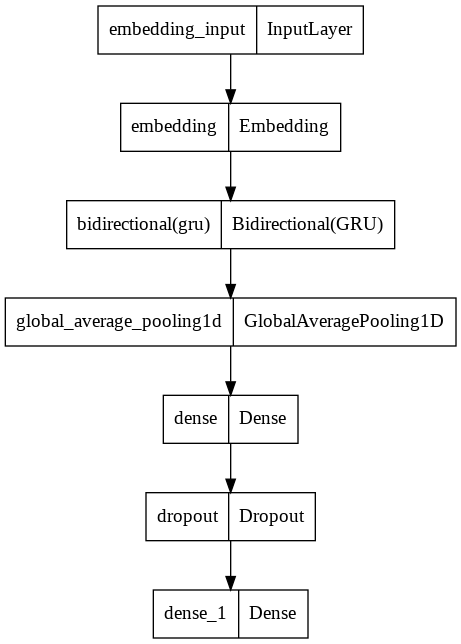

In [33]:
# 모델 살펴보기
tf.keras.utils.plot_model(model)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32567, 286), (2964, 286), (32567,), (2964,))

In [35]:
pip install keras.utils

In [36]:
pip install to_categorical

ERROR: Could not find a version that satisfies the requirement to_categorical (from versions: none)
ERROR: No matching distribution found for to_categorical


In [37]:
# 카테고리화
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical 는 import 되지않는 이슈 발생

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

모델학습

In [40]:
num_epochs = 3
history = model.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test))

Epoch 1/3
1018/1018 [==============================] - 1438s 1s/step - loss: 0.8984 - accuracy: 0.5674 - val_loss: 0.7244 - val_accuracy: 0.6977
Epoch 2/3
1018/1018 [==============================] - 1433s 1s/step - loss: 0.5521 - accuracy: 0.8013 - val_loss: 0.4749 - val_accuracy: 0.8239
Epoch 3/3
1018/1018 [==============================] - 1437s 1s/step - loss: 0.3288 - accuracy: 0.8958 - val_loss: 0.4531 - val_accuracy: 0.8445


In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

모델 Accuracy 와 loss

In [42]:
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

Accuracy on training data is:- 89.5784080028534 %
Loss 32.883453369140625
Accuracy on validation data is:- 84.44669246673584 %
Loss 45.31141221523285


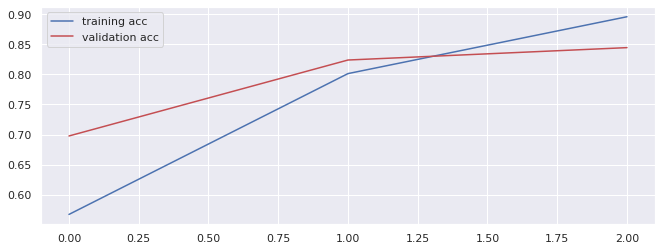

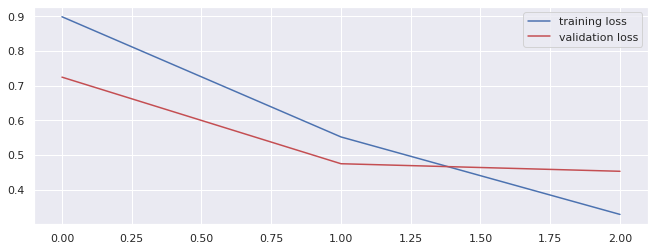

In [43]:
# plot으로 시각화해보기
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()

In [47]:
# 텐서플로우 최신버전에서는 작동하지 않음
# pred = model.predict_classes(x_test)

AttributeError: ignored

In [50]:
pred = np.argmax(model.predict(x_test), axis=-1)

Confusion Matrix 확인해보기

In [51]:
cm = confusion_matrix(np.argmax(y_test,1),pred)
cm

array([[ 387,   47,   63],
       [  23, 1070,  114],
       [  40,  174, 1046]])

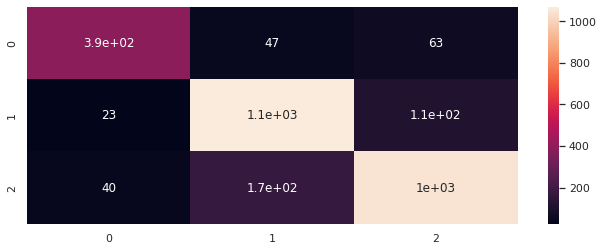

In [52]:
sns.heatmap(cm,annot=True)

Classification Report 확인해보기

In [53]:
print(classification_report(np.argmax(y_test,1),pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       497
           1       0.83      0.89      0.86      1207
           2       0.86      0.83      0.84      1260

    accuracy                           0.84      2964
   macro avg       0.85      0.83      0.84      2964
weighted avg       0.85      0.84      0.84      2964



아쉬운점 
- 시간이 많지않아 에폭을 3개를 했지만 시간이 충분하다면 10개까지 늘려보고싶다.
- 좀더 다양한 모델을 하나의 데이터에 적용해보고싶다. -> 추후에 다른방법도 적용해볼것이다.